# Determinants In-Depth
###  Machine Learning Motivation

Before diving into formulas, let’s understand **why machine learning cares about determinants**.

When we train models like **Linear Regression** or **PCA**, we often deal with matrices that transform data:


y = A x


If that transformation collapses data into a lower dimension (say, squashing a 3D cloud into a 2D plane), some information is lost — we can’t “undo” it.

➡️ The **determinant** tells us exactly **how much space changes** under a transformation:

- If `det(A) = 0` → space collapses → transformation is **singular**, **non-invertible**.  
- If `det(A) ≠ 0` → transformation preserves full dimensionality → **invertible**.

💡 **In ML terms:**
When $$det(X^T X)=0$$


your feature matrix `X` has **redundant or dependent columns**.  
The model can’t learn unique weights — it’s like trying to fit different labels to the same input line.



---


### Singularity and Rank of a Linear Transformation

A matrix is **singular** if it loses dimension.

For a 2×2 matrix, imagine all arrows in the plane being squashed onto a single line.  
That happens when rows or columns are **linearly dependent** — one is a scaled version of another.

Mathematically:

det(A) = 0 ⇒ A is singular

det(A) ≠ 0 ⇒ A is nonsingular (invertible)

💡 **Link to rank:**
- If rank < n → determinant = 0  
- If full rank → determinant ≠ 0  

So the determinant is like a **numerical echo of rank** — one scalar that encodes all independence information.




---
### Determinant as an Area (or Volume)
Let’s start with the 2D case to build intuition.


$$A =
\begin{bmatrix}
a & b \\
c & d
\end{bmatrix}$$


Then:


det(A) = ad - bc


Geometrically, the two column vectors of A:


$$v_1 = \begin{bmatrix} a \\ c \end{bmatrix}, \quad
v_2 = \begin{bmatrix} b \\ d \end{bmatrix}$$


form a parallelogram.  
The determinant is the **signed area** of that parallelogram.

- |det(A)| → size of the area after transformation  
- sign(det(A)) → orientation (handedness) flip




---

### 🧪 Lab: Computing and Visualizing Determinants

Determinant of A: 1.00


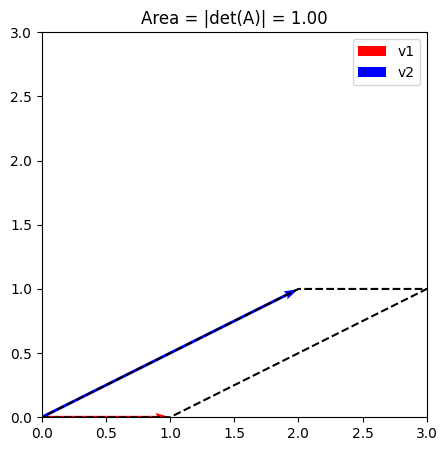

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Example 1: Simple transformation
A = np.array([[1, 2],
              [0, 1]])

det_A = np.linalg.det(A)
print(f"Determinant of A: {det_A:.2f}")

# Visualization
v1 = A[:, 0]
v2 = A[:, 1]

# Parallelogram visualization
origin = np.zeros(2)
fig, ax = plt.subplots(figsize=(5, 5))
ax.quiver(*origin, *v1, angles='xy', scale_units='xy', scale=1, color='r', label='v1')
ax.quiver(*origin, *v2, angles='xy', scale_units='xy', scale=1, color='b', label='v2')

# Draw parallelogram
parallelogram = np.array([origin, v1, v1+v2, v2, origin])
ax.plot(parallelogram[:,0], parallelogram[:,1], 'k--')

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
ax.set_aspect('equal')
ax.legend()
ax.set_title(f"Area = |det(A)| = {abs(det_A):.2f}")
plt.show()


In this example, we use the matrix

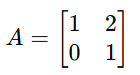

to visualize how the determinant represents the area scaling of a linear transformation in 2D space.

The red arrow (v1) and the blue arrow (v2) correspond to the two column vectors of matrix
𝐴
A.

These vectors define a parallelogram (shown with dashed black lines).

The area of this parallelogram equals the absolute value of the determinant of A:

Area=∣det(A)∣=1.0

This means that the transformation defined by A preserves area — the unit square is sheared into a parallelogram, but its total area remains the same.

💡 Intuition for Machine Learning

In machine learning, linear transformations like
𝐴
A appear in weight matrices of neural network layers.

If |det(A)| > 1, the transformation expands space (increases variation).

If |det(A)| < 1, it compresses space (reduces variation).

If det(A) = 0, information is lost — the transformation collapses space into a lower dimension.

In this case, det(A) = 1, so the transformation does not lose or expand information, it simply shears the data.

---



###  Examples

In [2]:
# Example 2: Scaling matrix
B = np.array([[2, 0],
              [0, 3]])

print(f"det(B) = {np.linalg.det(B):.2f}")  # Expected: 6

# Example 3: Singular matrix (columns are dependent)
C = np.array([[2, 4],
              [1, 2]])

print(f"det(C) = {np.linalg.det(C):.2f}")  # Expected: 0


det(B) = 6.00
det(C) = 0.00


| Matrix            | det(A) | Geometric Meaning     | Effect                    |
| ----------------- | ------ | --------------------- | ------------------------- |
| A = [[1,2],[0,1]] | 1      | Shear, preserves area | Keeps size, changes shape |
| B = [[2,0],[0,3]] | 6      | Scaling               | Expands area ×6           |
| C = [[2,4],[1,2]] | 0      | Singular (collapsed)  | Loses one dimension       |


---



### Determinant of a Product
property:

$$det(AB) = \det(A) \times \det(B)$$

This tells us transformations **stack multiplicatively** in how they scale space.

💡 **In ML:**
When computing composed transformations (like multi-layer linear maps), determinant multiplication shows how **scaling accumulates layer by layer**.


In [3]:
A = np.array([[2, 1],
              [0, 1]])
B = np.array([[1, 3],
              [0, 2]])

lhs = np.linalg.det(A @ B)
rhs = np.linalg.det(A) * np.linalg.det(B)

print(f"det(AB) = {lhs:.2f}")
print(f"det(A)*det(B) = {rhs:.2f}")


det(AB) = 4.00
det(A)*det(B) = 4.00


### Interpretation

Each matrix represents a linear transformation that scales or distorts space.
When transformations are composed (applied one after another), their determinant effects multiply rather than add.

Quantity	Meaning
det(A) = 2	Transformation A doubles the area
det(B) = 2	Transformation B also doubles the area
det(AB) = 4	Combined effect multiplies:

2×2=4

So, applying A and then B expands the area 4× larger than the original.

### 💡 Machine Learning Insight

In machine learning, matrices like A and B represent linear layers in neural networks.
This property shows that scaling effects accumulate multiplicatively across layers:
if each layer doubles the "volume" of the data space, two layers together multiply that by

2×2=4.

It’s a key reason why determinant-based properties are useful for understanding how transformations affect data flow and numerical stability in deep models.


---



### Determinants of Inverses

If a matrix stretches space by some factor, its inverse must shrink it back.

$$det(A^{-1}) = \frac{1}{\det(A)}$$

💡 **In ML:**
When we invert covariance matrices (e.g., in Gaussian models or Mahalanobis distance),  
we’re effectively reversing the data’s scaling.

In [4]:
A = np.array([[4, 0],
              [0, 2]])

inv_A = np.linalg.inv(A)

print(f"det(A) = {np.linalg.det(A):.2f}")
print(f"det(A^-1) = {np.linalg.det(inv_A):.2f}")
print(f"Product = {np.linalg.det(A)*np.linalg.det(inv_A):.2f}  # Should be 1")


det(A) = 8.00
det(A^-1) = 0.13
Product = 1.00  # Should be 1




---

### Quick Practice

Given

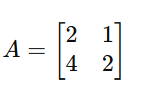

1️⃣ Compute det(A).


det(A)=(2)(2)−(4)(1)=4−4=0

Result:

det(A)=0

2️⃣ What does that tell you about singularity and invertibility?

- Because the determinant is 0, the matrix is singular — it does not have an inverse.

Its columns are linearly dependent:
The second column [4, 2]ᵀ is just 2 × [2, 1]ᵀ.

- So the transformation collapses all points onto a line.

3️⃣ Geometrically, what happens to the 2D plane under this transformation?

In 2D, this transformation takes the entire plane and flattens it onto a single line.
No area is left — everything gets squashed into one dimension.

det(A) = 0.00
🔸 A is singular → not invertible (columns are dependent).


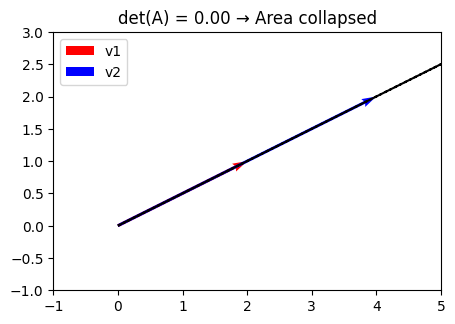

In [6]:

A = np.array([[2, 4],
              [1, 2]])
det_A = np.linalg.det(A)

print(f"det(A) = {det_A:.2f}")

if np.isclose(det_A, 0):
    print("🔸 A is singular → not invertible (columns are dependent).")
else:
    print("✅ A is invertible (full rank).")

# Visualization
v1 = A[:, 0]
v2 = A[:, 1]

fig, ax = plt.subplots(figsize=(5, 5))
ax.quiver(0, 0, *v1, color='r', angles='xy', scale_units='xy', scale=1, label='v1')
ax.quiver(0, 0, *v2, color='b', angles='xy', scale_units='xy', scale=1, label='v2')
ax.plot([0, v1[0], v1[0]+v2[0], v2[0], 0],
        [0, v1[1], v1[1]+v2[1], v2[1], 0], 'k--')

ax.set_xlim(-1, 5)
ax.set_ylim(-1, 3)
ax.set_aspect('equal')
ax.legend()
ax.set_title(f"det(A) = {det_A:.2f} → Area collapsed")
plt.show()


 - Both column vectors (v1 and v2) lie on the same line,
 - meaning the transformation collapses the 2D plane into a 1D line.
 - The determinant is zero because there is no area left —
 - the matrix is singular and non-invertible.